# Sampling From Unknown Distributions


Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/statcomp](https://feng.li/statcomp)


In [1]:
options(jupyter.plot_scale=0.8)

## Direct Methods

- Only need random numbers from uniform

- Assume that we have a way to simulate from a uniform distribution between $0$ and $1$, $u\sim U(0,1)$

- If this is available, it is possible to simulate many other probability distributions.

- The most simple method is the **Direct Method**

### Discrete Case: Example 1

-   Assume that we want to simulate a binary variable $X$ with
    $\mbox{Pr}(X=1)=0.3$ and $\mbox{Pr}(X=0)=0.7$

-   Let $u\sim U(0,1)$. Then the following rule can be used
    $$x=\left\{\begin{array}{c}
                     1 \quad \mbox{if $u<0.3$}\\
                     0 \quad \mbox{if $u>0.3$}\\
                   \end{array}
                 \right.$$

-   It is expected that if this is repeated many times 30% $X=1$ and 70%
    $X=0$

In [2]:
u = runif(100)
x = ifelse(u<0.3, yes=1, no=0)
x

[1] 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 [38] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 [75] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0

![image](figures/d1p1.png) 

![image](figures/d1p3.png) 

### Discrete Case: Example 2

-   Assume that we want to **simulate a discrete variable $X$ with
    probability** $\mbox{Pr}(X=0)=0.3$ and $\mbox{Pr}(X=1)=0.25$ and
    $\mbox{Pr}(X=2)=0.45$

-   Let $u\sim U(0,1)$. Then the following rule can be used
    $$x=\left\{\begin{array}{l}
                            0 \quad \mbox{if $u<0.3$}\\
                            1 \quad \mbox{if $0.3<u<0.55$}\\
                            2 \quad \mbox{if $u>0.55$}
                          \end{array}
                        \right.$$

-   It is expected that if this is repeated many times, roughly 30%
    $X=0$, 25% $X=1$ and 45% $X=2$

![image](figures/d2p3.png) 

### Continuous Case

-   How do we extend this idea to the continuous case?

-   What was the step function in our discrete example?

-   It is the **cumulative distribution function (CDF)**

-   Can we replace the discrete cdf with a continuous cdf?

-   Yes!

![image](figures/cp1.png) 

![image](figures/cp3.png) 


### Continuous Case

-   The cdf, $F(X)$ takes values of $X$ and gives a value between $0$
    and $1$

-   Here we take values between $0$ and $1$ and get a value of $X$

-   What function do we use?

-   We use the **Inverse cdf**

### Continuous Case: Direct Methods

#### Probability Integral Transform

-   If $Y$ is a continuous random variable with cdf $F(y)$ , then the
    random variable $F_y^{-1}(U)$, where $U \sim uniform(O, 1)$, has
    distribution $F(y)$.

-   **Example:** If $Y \sim exponential(A)$, then the probability
    density function (PDF) is
    $$f(x;\lambda) = \begin{cases} \lambda e^{-\lambda x} & x \ge 0, \\ 0 & x < 0. \end{cases}$$
    and the cumulative distribution function (CDF) is given by
    $$F(x;\lambda) = \begin{cases} 1-e^{-\lambda x} & x \ge 0, \\ 0 & x < 0. \end{cases}$$
    Then $$F_Y^{-1}(U) = -\log(1-U)/\lambda$$ is an exponential random
    variable.

-   Thus, if we generate $U_1,..., U_n$ as iid uniform random variables,
    $-\lambda (1-U_i)$, are iid exponential random variables with
    parameter $\lambda$.

In [3]:
u2x <- function(u, lambda)
    {
        x <- - log(1-u)/lambda
        return(x)
    }

rmyexp <- function(n, lambda)
    {
        u <- runif(n, 0, 1)
        x <- u2x(u, lambda)
        return(x)
    }

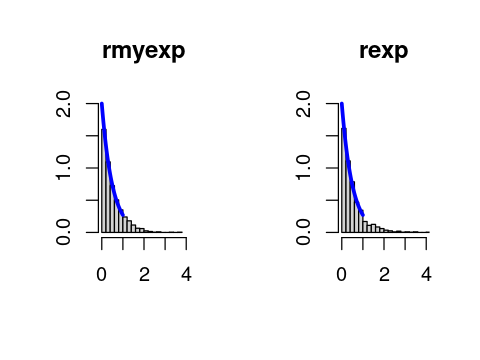

In [8]:
n = 1000
lambda = 2

par(mfrow = c(1, 2))
ylim <- c(0, 2)
xlim <- c(0, 4)
hist(rmyexp(n, lambda), breaks = 20, freq = FALSE,
     xlim = xlim, ylim = ylim, xlab="", ylab="", main="rmyexp")

xax <- seq(0, max(x), 0.01)
xDens <- lambda*exp(-lambda*xax)

lines(xax, xDens, type = "l",
     col = "blue", lwd = 3)

hist(rexp(n, rate = lambda), breaks = 20, freq = FALSE,
     xlim = xlim, ylim = ylim, xlab="", ylab="", main="rexp")
lines(xax, xDens, type = "l",
     col = "blue", lwd = 3)

## Indirect Methods

Indirect simulation

-   What if the cumulative distribution function is difficult to invert,
    or not even available?

-   How to invert the CDF of a standard normal distribution?

    $$F(x)=\int_{-\infty}^{x}(2\pi)^{-1/2}e^{-x^2/2}dx$$


-   It is still possible to simulate from this type of distribution?

-   If the **density** is available, then the answer is YES!

The mixture of normal distribution

-   The mixture of normal distribution has density function

    $$f(x, \omega, \mu_1, \mu_2, \sigma_1, \sigma_2) = \omega N(x, \mu_1, \sigma_1) + (1- \omega)  N(x, \mu_2, \sigma_2)$$

    where $0 < \omega <1$ is the weight.

-   It is based on the combination of the normal but has many features.

-   It is not so easy to simulate from this distribution using the
    direct method.

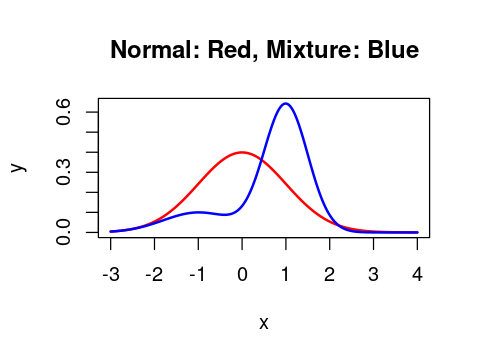

In [43]:
w = 0.2
mu1 = -1
mu2 = 1
sigma1 = 0.8
sigma2 = 0.5

xgrid<-seq(-3, 4, 0.01)
nm <- dnorm(xgrid)
mix <-w*dnorm(xgrid, mu1, sigma1) + (1-w)*dnorm(xgrid, mu2, sigma2)
plot(xgrid, nm, "l", lwd=2, col='red',main='Normal: Red, Mixture: Blue',
     xlab = 'x', ylab = 'y', ylim=c(0, max(nm,mnm)))
lines(xgrid, mix, lwd=2,col='blue')

The idea

-   Let $f_y(x)$ be the **target distribution** and $f_v(v)$ be the
    **proposal distribution**

-   Simulate an $x$-coordinate from the proposal $f_v(x)$

-   Simulate a y-coordinate from $U(0, M*f_v(x))$

-   Reject any points that are not ‘inside’ $f_y(x)$

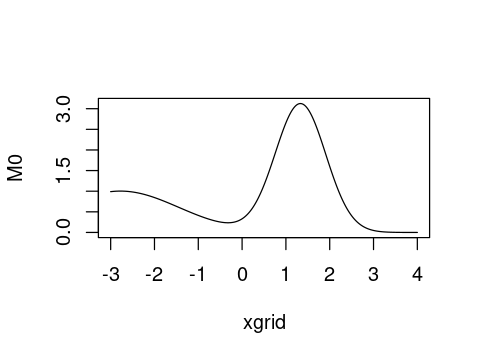

In [44]:
M0 = (w*dnorm(xgrid, mu1, sigma1) + (1-w)*dnorm(xgrid, mu2, sigma2))/dnorm(xgrid) 
plot(xgrid, M0, type="l")

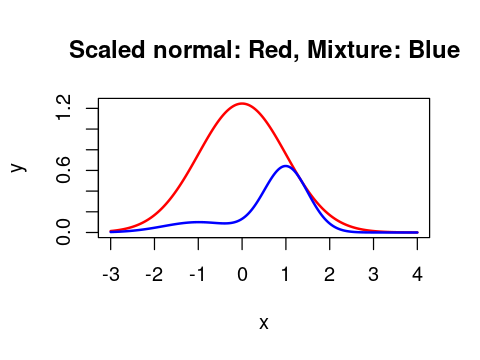

In [45]:
M = max(M0)
Mnm <-M*nm
plot(xgrid, Mnm, lwd=2, type="l",col='red',main='Scaled normal: Red, Mixture: Blue',xlab = 'x',ylab = 'y')
lines(xgrid, mix, lwd=2, col='blue')

#### Reject and accept method

-   **Theorem:** Let $Y \sim f_Y(y)$ and $V \sim f_v(v)$, where $f_Y$
    and $f_V$ have common support with
    $$M = sup_y f_Y(y)/f_V(y) < \infty.$$ To generate a random variable
    $Y\sim f_Y$, we do the following steps

    1.  Generate $U\sim uniform(0,1)$ and $V\sim f_V$ independently.

    2.  If $$U < \frac{1}{M} \frac{f_Y(V)}{f_V(V)}$$ set $Y = V$;
        otherwise, return to step 1.

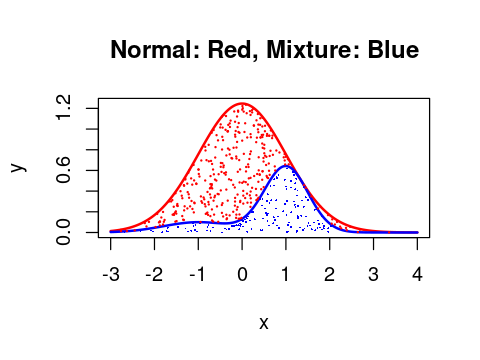

In [46]:
n<-500
xp<-rnorm(n)
yp<-M*dnorm(xp)*runif(n)

plot(xgrid, Mnm, lwd=2, type="l",col='red',main='Normal: Red, Mixture: Blue',xlab = 'x',ylab = 'y')
lines(xgrid, mix, lwd=2, col='blue')

dmix = w*dnorm(xp, mu1, sigma1) + (1-w)*dnorm(xp, mu2, sigma2)
points(xp[yp>=dmix],yp[yp>=dmix], col='red',pch=20, cex=0.2)
points(xp[yp<dmix],yp[yp<dmix], pch=16, cex=0.2, col='blue')

#### Reject and accept method: the proof

$$\begin{aligned}
                  P(V\leq y |stopping~rule)&= P(V\leq y | U < \frac{1}{M} \frac{f_Y(V)}{f_V(V)})\\
                                           &= \frac{P(V\leq y , U < \frac{1}{M} \frac{f_Y(V)}{f_V(V)})}{P(U <
                                             \frac{1}{M} \frac{f_Y(V)}{f_V(V)})}\\
                                           &= \frac{\int_{-\infty}^y\int_0^{\frac{1}{M}
                                             \frac{f_Y(V)}{f_V(V)}}du~f_V(v)dv}{\int_{-\infty}^{\infty}\int_0^{\frac{1}{M}
                                             \frac{f_Y(V)}{f_V(V)}}du~f_V(v)dv}\\
                                           &= \frac{\int_{-\infty}^y\frac{1}{M}
                                             \frac{f_Y(V)}{f_V(V)}f_V(V)dv}{\int_{-\infty}^{\infty}\frac{1}{M}
                                             \frac{f_Y(V)}{f_V(V)}f_V(V)dv}\\
                                           &=\int_{-\infty}^y f_Y(v)dv
                \end{aligned}$$

-   Can have any $M$? In fact $M$ shows the efficiency of the sampling
    algorithm, i.e. $M= 1/P(stopping~rule)$.


#### Choosing $f_v(x)$ and $M$

-   Two things are necessary for the accept/reject algorithm to work:

    1.  The domain of $p(x)$ and the domain of $q(x)$ MUST be the same.

    2.  The value of $M$ must satisfy $M\geq \sup_x p(x)/q(x)$

-   The algorithm will be more **efficient** if:

    1.  The proposal $q(x)$ is a good approximation to $p(x)$

    2.  The value of $M$ is $M=\sup_x p(x)/q(x)$

#### A look at $f_y(x)/f_v(x)$



Normalizing Constant and Kernel

-   Today we saw many density functions $f(x)$

-   Many density functions can written as $f(x)=k\tilde{f}(x)$

-   The part $k$ is called the normalizing constant and the part
    $\tilde{f}(x)$ is called the kernel.

-   For example the standard normal distribution is
    $$p(x)=(2\pi)^{-1/2}e^{-x^2/2}$$

Normalizing Constant and Kernel What are the normalizing constant and
kernel of the Beta function?

$$Beta(x;a,b)=\frac{\Gamma(a+b)}{(\Gamma(a)\Gamma(b))}{x^{a-1}(1-x)^{b-1}}$$

Accept/Reject and the normalising constant

-   An advantage of the Accept/Reject algorithm is that is works, even
    if the normalizing constant is unavailable.

-   Only the kernel is needed.

-   There are many examples where the normalising constant is either
    unavailable or difficult to compute.

-   This often happens in Bayesian analysis
